# 1. Understanding the dataset

### Importing the nescessary libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### Reading the dataset

In [82]:
df = pd.read_csv("drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [83]:
#profile = pp.ProfileReport(df)
#profile.to_file("output.html")

### Number of rows and columns in the dataset

In [84]:
df.shape

(200, 6)

### Info of columns in the dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Check for null values

In [86]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# 2. Data Exploration

1. Numerical columns=2
2. Categorical columns=4

### Unique values in each column

### 1. Age

In [87]:
print("Number of Unique elements in Age column: ", df["Age"].nunique())
print("Maximum Age: ", max(df["Age"]))
print("Minimum Age: ", min(df["Age"]))
print()
print("Unique elements : \n", df["Age"].unique())


Number of Unique elements in Age column:  57
Maximum Age:  74
Minimum Age:  15

Unique elements : 
 [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]


### 2. Sex

In [88]:
print("Unique Elements: ", df["Sex"].unique())
print("Number of Unique elements in Sex column: ", df["Sex"].nunique())

Unique Elements:  ['F' 'M']
Number of Unique elements in Sex column:  2


### 3. BP

In [89]:
print("Unique Elements: ", df["BP"].unique())
print("Number of Unique elements in BP column: ", df["BP"].nunique())

Unique Elements:  ['HIGH' 'LOW' 'NORMAL']
Number of Unique elements in BP column:  3


### 4. Cholestrol

In [90]:
print("Unique elements : ", df["Cholesterol"].unique())
print("Number of Unique elements in cholesterol column: ", df["Cholesterol"].nunique())


Unique elements :  ['HIGH' 'NORMAL']
Number of Unique elements in cholesterol column:  2


### 5. Na_to_K

In [91]:
print("Number of Unique elements in Na_to_K: ", df["Na_to_K"].nunique())
print()
print("Unique elements : \n", df["Na_to_K"].unique())

Number of Unique elements in Na_to_K:  198

Unique elements : 
 [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294  8.968 11.953 20.013  9.677 16.85
  7.49   6.683  9.17  13.769  9.281 18.295  9.514 10.103 10.292 25.475
 27.064 17.206 22.456 16.753 12.495 25.969 16.347  7.845 33.542  7.477
 20.489 32.922 

### 6. Drug

In [92]:
print("Unique elements :", df["Drug"].unique())
print("Number of Unique elements in Drug column: ", df["Drug"].nunique())

Unique elements : ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
Number of Unique elements in Drug column:  5


### 7. Skewness

In [93]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


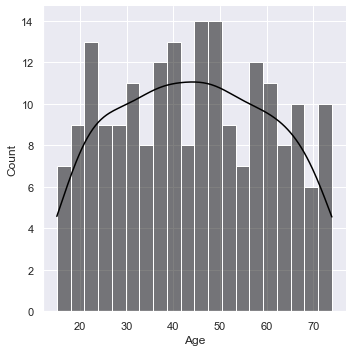

In [94]:
sns.displot(df["Age"] , kde=True, bins = 20, color = "black")
plt.savefig('Skew_normal.png', transparent=True)
plt.show()

Normal skewness, Symmetrical

In [95]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


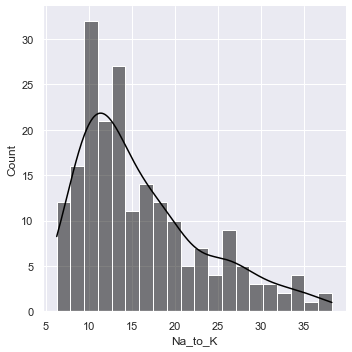

In [96]:
sns.displot(df["Na_to_K"] , kde=True, bins = 20,color = "black")
plt.savefig('Skew_right.png', transparent=True)
plt.show()

Right skewed

# 3. Data Visualization and EDA

### 1. Distribution of males and females

In [97]:
# Inference:- Males > Females
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

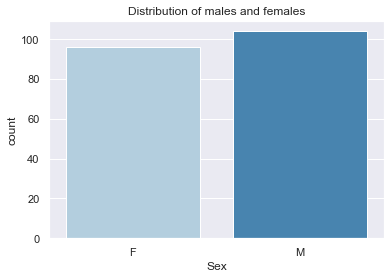

In [98]:
sns.countplot(x='Sex', data = df, palette="Blues").set_title('Distribution of males and females')
plt.savefig('Distribution of different BP level.png', transparent=True)

### 2. Distribution of different BP level

In [99]:
# Inference:- Maximumn people are having High BP
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

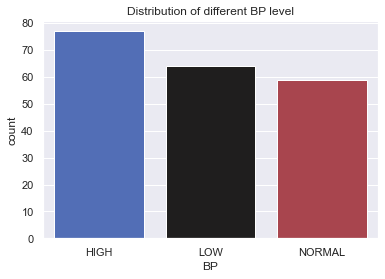

In [100]:
sns.countplot(x='BP', data = df, palette="icefire").set_title('Distribution of different BP level')
plt.savefig('Distribution of different BP level.png', transparent=True)

### 3. Distribution of different cholesterol levels

In [101]:
# Maximum people are having high cholesterol
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

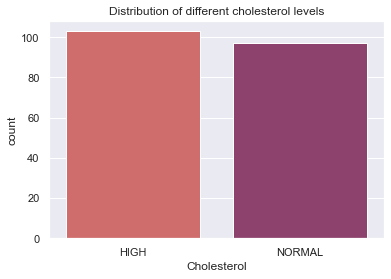

In [102]:
sns.countplot(x='Cholesterol', data = df, palette="flare").set_title('Distribution of different cholesterol levels')
plt.savefig('Distribution of different cholesterol levels.png', transparent=True)

### 4. Distribution of different drugs

In [103]:
# Inference:- Drug Y is presecribed the most
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

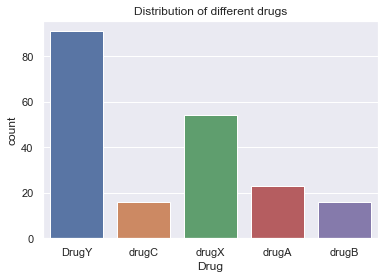

In [104]:
sns.countplot(x='Drug', data = df).set_title('Distribution of different drugs')
plt.savefig('Distribution of different drugs.png', transparent=True)

### 5. Gender distribution based on drug type

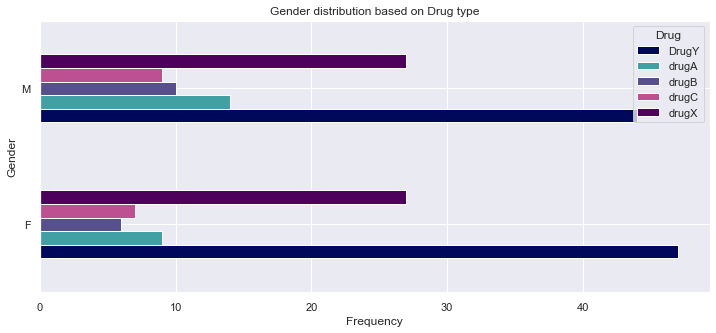

In [105]:
pd.crosstab(df.Sex,df.Drug).plot(kind="barh",figsize=(12,5),color=['#00085c','#41a0a3','#58508d','#bc5090','#4d005c'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Frequency')
plt.xticks(rotation=0)
plt.ylabel('Gender')
plt.show()

### 6. Frequency - Sex vs Cholesterol

[Text(0.5, 1.0, 'Frequency - Sex vs Cholesterol')]

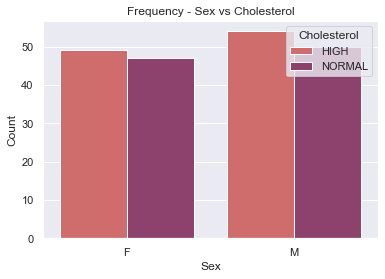

In [106]:
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count"), palette="flare").set(title = "Frequency - Sex vs Cholesterol")

### 7. Frequency - Sex vs BP

[Text(0.5, 1.0, 'Frequency - Sex vs BP')]

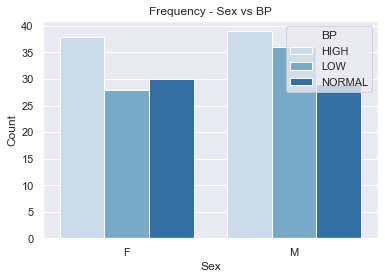

In [107]:
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df.groupby(["Sex", "BP"]).size().reset_index(name = "Count"), palette="Blues").set(title = "Frequency - Sex vs BP")

### 8. BP based on Cholesterol

In [108]:
df.groupby(["BP","Cholesterol"])["Drug"].count().reset_index()

,BP,Cholesterol,Drug
0,HIGH,HIGH,35
1,HIGH,NORMAL,42
2,LOW,HIGH,31
3,LOW,NORMAL,33
4,NORMAL,HIGH,37
5,NORMAL,NORMAL,22


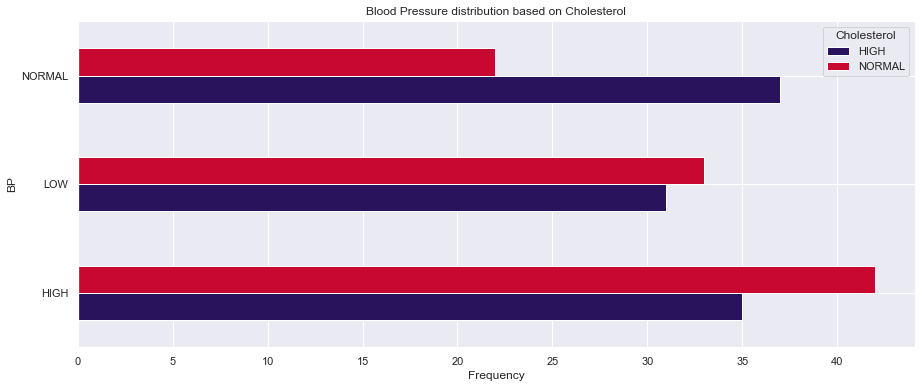

In [109]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="barh",figsize=(15,6),color=['#28135c','#c90832'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Frequency')
plt.xticks(rotation=0)
plt.ylabel('BP')
plt.show()

### 9. Na_to_K based on gender and age

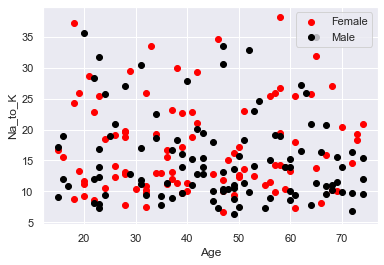

In [110]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="red")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="black")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

### 10. Drugs prescribed to sex

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



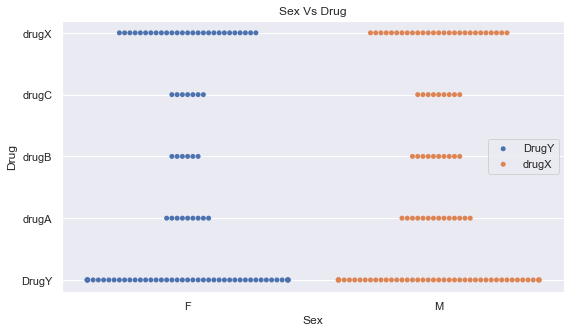

In [111]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Sex", y = "Drug",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Sex Vs Drug")
plt.show()

1. Drug Y is prescribed the most to males and females
2. Drug B is prescribed the least to females
3. Drug C is prescribed the least to males

In [112]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


### 11. Drugs prescribed according to BP level

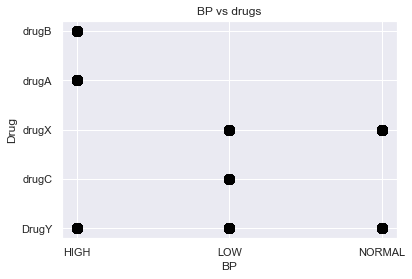

In [113]:
df.plot(kind='scatter',x='BP',y='Drug', title = "BP vs drugs", color = "black", s=100)
plt.savefig('Cholesterol vs drugs.png', transparent=True)

In [114]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


1. People having High BP are prescribed only drug Y,A,B
2. People having Low BP are prescibed only drug Y,C,X
3. People having Normal BP are prescribed drug X,Y

### 12. Drugs prescribed according to Cholesterol level

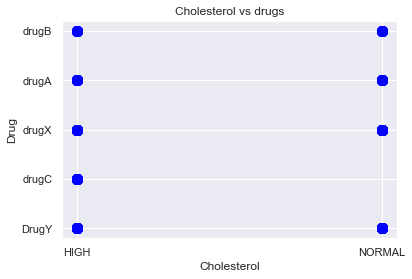

In [115]:
df.plot(kind='scatter',x='Cholesterol',y='Drug', title = "Cholesterol vs drugs", color = "blue", s=100)
plt.savefig('Cholesterol vs drugs.png', transparent=True)

1. People with High cholesterol are described all drugs
2. People with normal cholesterol are described drug X,Y,A,B

### 13. Drugs prescribed according to Na_to_K

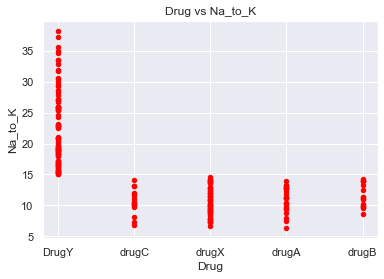

In [116]:
df.plot(kind='scatter',x='Drug',y='Na_to_K', title = "Drug vs Na_to_K", color = "red")
plt.savefig('Drug vs Na_to_K.jpg')

1. People with more than 15.015 Na_to_K are prescribed DrugY
2. People with less than 15.015 Na_to_K are prescribed DrugC, DrugX, DrugA, DrugB

### 14. Drugs prescribed according to Age

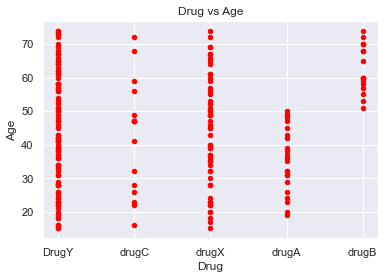

In [117]:
df.plot(kind='scatter',x='Drug',y='Age', title = "Drug vs Age", color = "red")
plt.savefig('Drug vs Age.png', transparent=True)

People less than 50 age are not prescribed drug B and people greater than 51 age are not prescribed drug A

In [118]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


### 15. Na_to_K Vs BP Vs Drug

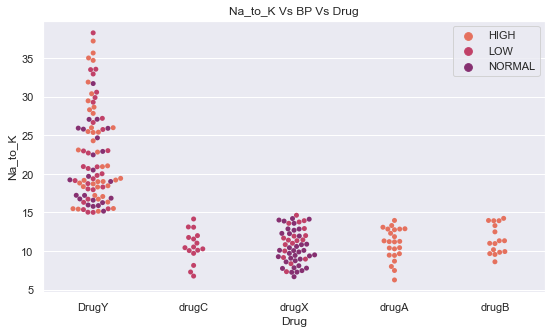

In [119]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df, palette="flare")
plt.legend()
plt.title("Na_to_K Vs BP Vs Drug")
plt.show()

# 4. Data Modeling

The age will be divided into 7 age categories:
Age 
1. Below 20 y.o.
2. 20 - 29 y.o.
3. 30 - 39 y.o.
4. 40 - 49 y.o.
5. 50 - 59 y.o.
6. 60 - 69 y.o.
7. Above 70.

In [120]:
binary_age = [0, 19, 29, 39, 49, 59, 69, 80]
categories_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>70s']
df['Age_binned'] = pd.cut(df['Age'], bins=binary_age, labels=categories_age)
df = df.drop(['Age'], axis = 1)

The ratio will be divided into 4 categories: Na_to_K
1. Below 10.
2. 10 - 20.
3. 20 - 30.
4. Above 30.

In [121]:
binary_NatoK = [0, 9, 19, 29, 50]
categories_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=binary_NatoK, labels=categories_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

### 4.1. Splitting the dataset into train and test parts

Division into 70%-30% split

In [122]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 4.2. Feature Engineering

In [123]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
#used for data manipulation. It converts categorical data into dummy or indicator variables

In [124]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>70s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [125]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>70s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


Synthetic Minority Oversampling Technique (SMOTE) Technique - Oversampling as values of drugY are more                          
For balancing out the imbalanced data

In [126]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

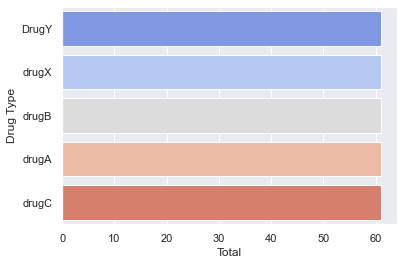

In [127]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="coolwarm")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

### 4.3. Models

### i. Decision Tree

In [128]:
DT = DecisionTreeClassifier(max_leaf_nodes=20)
DT.fit(X_train, y_train)

y_pred1 = DT.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))

Acc1 = accuracy_score(y_pred1,y_test)
print('\nDecision Tree accuracy is: {:.2f}%'.format(Acc1*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       0.90      0.63      0.75        30
       drugA       0.56      1.00      0.71         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.78        60
   macro avg       0.74      0.90      0.79        60
weighted avg       0.82      0.78      0.78        60

Confusion Matrix: 
 [[19  4  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]

Decision Tree accuracy is: 78.33%


Leaf vs Score

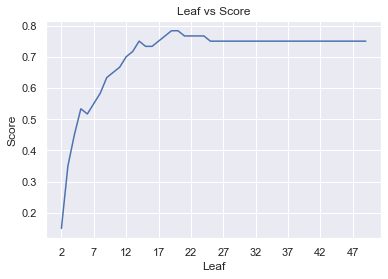

DT Acc Max 78.33%


In [129]:
scoreListDT = []
for i in range(2,50):
    DT = DecisionTreeClassifier(max_leaf_nodes=i)
    DT.fit(X_train, y_train)
    scoreListDT.append(DT.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.title("Leaf vs Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

### ii. Support Vector Machine (SVM)

In [130]:
SVM = SVC(kernel='linear', max_iter=251)
SVM.fit(X_train, y_train)

y_pred2 = SVM.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))

Acc2 = accuracy_score(y_pred2,y_test)
print('\nSVC accuracy is: {:.2f}%'.format(Acc2*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

Confusion Matrix: 
 [[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]

SVC accuracy is: 83.33%


C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning:

Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



### iii. Logistic Regression

In [131]:
LR = LogisticRegression(solver='liblinear', max_iter=5000)
LR.fit(X_train, y_train)

y_pred3 = LR.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))

Acc3 = accuracy_score(y_pred3,y_test)
print('\nLogistic Regression accuracy is: {:.2f}%'.format(Acc3*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

Confusion Matrix: 
 [[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]

Logistic Regression accuracy is: 85.00%


### iv. Random Forest

In [132]:
rf = RandomForestClassifier(max_leaf_nodes=30)
rf.fit(X_train, y_train)

y_pred4 = rf.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred4))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred4))

Acc4 = accuracy_score(y_pred4,y_test)
print('\nRandom Forest accuracy is: {:.2f}%'.format(Acc4*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       1.00      0.63      0.78        30
       drugA       0.62      1.00      0.77         5
       drugB       0.60      1.00      0.75         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.74      0.93      0.80        60
weighted avg       0.87      0.82      0.81        60

Confusion Matrix: 
 [[19  3  2  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]

Random Forest accuracy is: 81.67%


RF Value vs Score

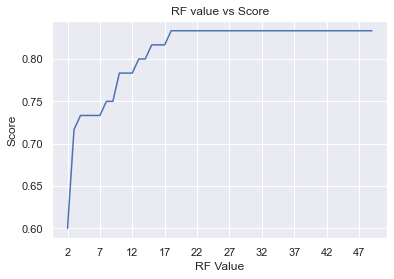

RF Acc Max 83.33%


In [133]:
scoreListRF = []
for i in range(2,50):
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf.fit(X_train, y_train)
    scoreListRF.append(rf.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.title("RF value vs Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

### v. Naive Bayes

### v.1. Gaussian NB

In [134]:
NB_1 = GaussianNB()
NB_1.fit(X_train, y_train)

y_pred_5_1 = NB_1.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred_5_1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_5_1))

Acc_5_1 = accuracy_score(y_pred_5_1,y_test)
print('\nGaussian Naive Bayes accuracy is: {:.2f}%'.format(Acc_5_1*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       0.64      0.90      0.75        30
       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.39      0.56        18

    accuracy                           0.70        60
   macro avg       0.81      0.70      0.66        60
weighted avg       0.79      0.70      0.67        60

Confusion Matrix: 
 [[27  0  1  2  0]
 [ 4  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [11  0  0  0  7]]

Gaussian Naive Bayes accuracy is: 70.00%


### v.2. Categorical NB

In [135]:
NB_2 = CategoricalNB()
NB_2.fit(X_train, y_train)

y_pred_5_2 = NB_2.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred_5_2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_5_2))
 
Acc_5_2 = accuracy_score(y_pred_5_2,y_test)
print('\nNaive Bayes accuracy is: {:.2f}%'.format(Acc_5_2*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

Confusion Matrix: 
 [[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]

Naive Bayes accuracy is: 85.00%


### vi. K Neighbours

In [136]:
KN = KNeighborsClassifier(n_neighbors=20)
KN.fit(X_train, y_train)

y_pred_6 = KN.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred_6))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_6))

Acc_6 = accuracy_score(y_pred_6,y_test)
print('\nK Neighbours accuracy is: {:.2f}%'.format(Acc_6*100))

Classification Report: 
               precision    recall  f1-score   support

       DrugY       0.84      0.70      0.76        30
       drugA       0.57      0.80      0.67         5
       drugB       0.50      0.67      0.57         3
       drugC       0.33      0.25      0.29         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.75        60
   macro avg       0.61      0.67      0.63        60
weighted avg       0.76      0.75      0.75        60

Confusion Matrix: 
 [[21  2  1  2  4]
 [ 0  4  1  0  0]
 [ 0  1  2  0  0]
 [ 3  0  0  1  0]
 [ 1  0  0  0 17]]

K Neighbours accuracy is: 75.00%


K value vs Score

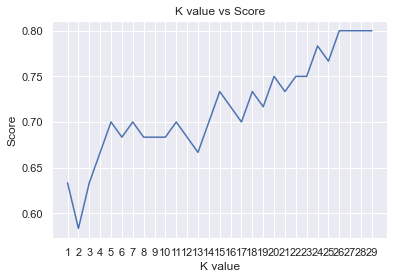

K Neighbours Acc Max 80.00%


In [137]:
scoreListknn = []
for i in range(1,30):
    KN = KNeighborsClassifier(n_neighbors = i)
    KN.fit(X_train, y_train)
    scoreListknn.append(KN.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("K value vs Score")
plt.show()
KNAccMax = max(scoreListknn)
print("K Neighbours Acc Max {:.2f}%".format(KNAccMax*100))

### 4.4. Model Comparison 

In [138]:
comparision = pd.DataFrame({'Model': ['Decision Tree', 'Decision Tree Max', 'SVM', 'Logistic Regression', 'Random Forest', 'Random Forest Max', 'Gaussian NB', 'Categorical NB', 'K Neighbors', 'K Neighbors Max'], 
                        'Accuracy': [Acc1*100, DTAccMax*100, Acc2*100, Acc3*100, Acc4*100, RFAccMax*100, Acc_5_1*100, Acc_5_2*100, Acc_6*100, KNAccMax*100]})
comparision.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Logistic Regression,85.000000
7,Categorical NB,85.000000
2,SVM,83.333333
5,Random Forest Max,83.333333
4,Random Forest,81.666667
9,K Neighbors Max,80.000000
0,Decision Tree,78.333333
1,Decision Tree Max,78.333333
8,K Neighbors,75.000000
6,Gaussian NB,70.000000


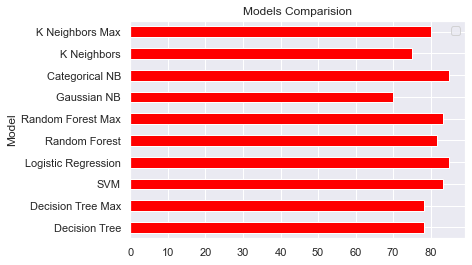

In [139]:
comparision.plot(x = "Model",y = "Accuracy", kind = "barh", title = "Models Comparision", color="red")
plt.legend("")
plt.savefig('Models Comparision.png', transparent=True)

### 4.5. Preparing the output format

In [140]:
pred_lr = NB_2.predict(X_test)
pred = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"], 
                           'Sex_M': X_test.loc[:,"Sex_M"], 
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"], 
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>70s': X_test.loc[:,"Age_binned_>70s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_lr})

pred['Sex_F'] = pred['Sex_F'].replace([1, 0],['Female', 'Male'])
pred['BP_HIGH'] = pred['BP_HIGH'].replace([1, 0],['High',''])
pred['BP_LOW'] = pred['BP_LOW'].replace([1, 0],['Low', ''])
pred['BP_NORMAL'] = pred['BP_NORMAL'].replace([1, 0],['Normal', ''])

pred['BP_HIGH'] = np.where((pred['BP_HIGH'] == ''), pred['BP_LOW'], pred['BP_HIGH'])
pred['BP_HIGH'] = np.where((pred['BP_HIGH'] == ''), pred['BP_NORMAL'], pred['BP_HIGH'])

pred['Cholesterol_HIGH'] = pred['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

pred['Age_binned_<20s'] = pred['Age_binned_<20s'].replace([1, 0],['<20s',''])
pred['Age_binned_20s'] = pred['Age_binned_20s'].replace([1, 0],['20s',''])
pred['Age_binned_30s'] = pred['Age_binned_30s'].replace([1, 0],['30s',''])
pred['Age_binned_40s'] = pred['Age_binned_40s'].replace([1, 0],['40s',''])
pred['Age_binned_50s'] = pred['Age_binned_50s'].replace([1, 0],['50s',''])
pred['Age_binned_60s'] = pred['Age_binned_60s'].replace([1, 0],['60s',''])
pred['Age_binned_>70s'] = pred['Age_binned_>70s'].replace([1, 0],['>70s',''])

pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_20s'], pred['Age_binned_<20s'])
pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_30s'], pred['Age_binned_<20s'])
pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_40s'], pred['Age_binned_<20s'])
pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_50s'], pred['Age_binned_<20s'])
pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_60s'], pred['Age_binned_<20s'])
pred['Age_binned_<20s'] = np.where((pred['Age_binned_<20s'] == ''), pred['Age_binned_>70s'], pred['Age_binned_<20s'])

pred['Na_to_K_binned_<10'] = pred['Na_to_K_binned_<10'].replace([1, 0],['<10',''])
pred['Na_to_K_binned_10-20'] = pred['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
pred['Na_to_K_binned_20-30'] = pred['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
pred['Na_to_K_binned_>30'] = pred['Na_to_K_binned_>30'].replace([1, 0],['>30s',''])

pred['Na_to_K_binned_<10'] = np.where((pred['Na_to_K_binned_<10'] == ''), pred['Na_to_K_binned_10-20'], pred['Na_to_K_binned_<10'])
pred['Na_to_K_binned_<10'] = np.where((pred['Na_to_K_binned_<10'] == ''), pred['Na_to_K_binned_20-30'], pred['Na_to_K_binned_<10'])
pred['Na_to_K_binned_<10'] = np.where((pred['Na_to_K_binned_<10'] == ''), pred['Na_to_K_binned_>30'], pred['Na_to_K_binned_<10'])

pred = pred.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>70s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
pred.rename(columns=new_name, inplace=True)

### 4.6. Saving the output in a CSV file

In [141]:
pred.to_csv('prediction.csv', index=False)
pred = pd.read_csv('./prediction.csv')
pred.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugC
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,DrugY
3,Male,High,Normal,20s,>30s,DrugY
4,Male,Normal,High,20s,20-30,DrugY
